In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df_train = pd.read_csv('train.csv')

df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
df_train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
# Correlation

df_train.corr()['Response'].sort_values(ascending=False)

Response                1.000000
Age                     0.111147
Annual_Premium          0.022575
Region_Code             0.010570
Driving_License         0.010155
Vintage                -0.001050
id                     -0.001368
Policy_Sales_Channel   -0.139042
Previously_Insured     -0.341170
Name: Response, dtype: float64

In [6]:
df_train['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

# Data Visualization

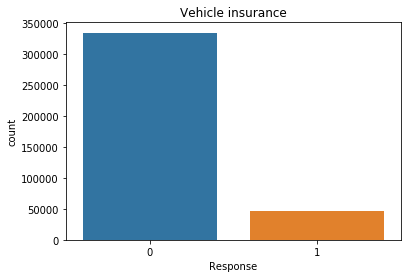

In [7]:
plt.title('Vehicle insurance')
sns.countplot(df_train['Response'])
plt.show()

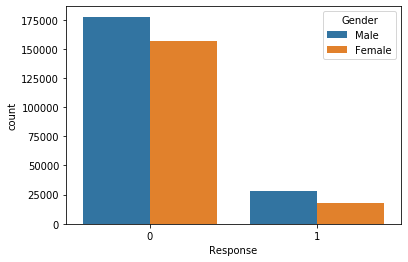

In [8]:
sns.countplot(df_train['Response'],hue=df_train['Gender'])

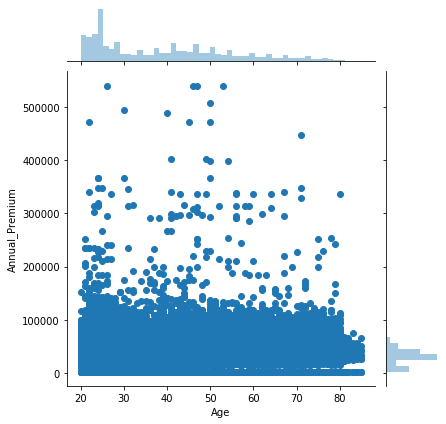

In [9]:
sns.jointplot(x='Age',y='Annual_Premium',data=df_train)

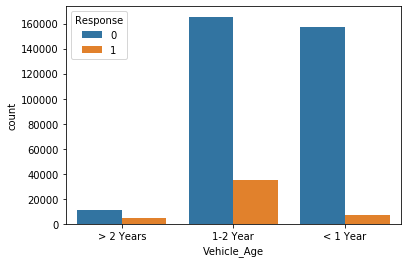

In [10]:
sns.countplot(df_train['Vehicle_Age'],hue=df_train['Response'])

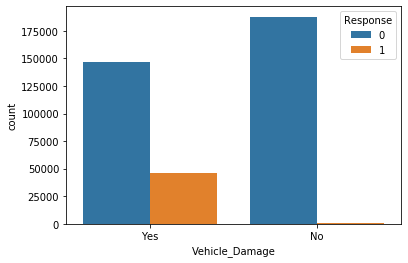

In [11]:
sns.countplot(df_train['Vehicle_Damage'],hue=df_train['Response'])

# Test Data

In [12]:
df_test = pd.read_csv('test.csv')
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


# Label Encoding 

In [13]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

train_obj = [feat for feat in df_train.columns if df_train[feat].dtype == 'O']
test_obj = [feat for feat in df_test.columns if df_test[feat].dtype == 'O']

for feat in train_obj:
    df_train[feat] = label.fit_transform(df_train[feat])
    
for feat in test_obj:
    df_test[feat] = label.fit_transform(df_test[feat])

In [14]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [15]:
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1,25,1,11.0,1,1,0,35786.0,152.0,53
1,381111,1,40,1,28.0,0,0,1,33762.0,7.0,111
2,381112,1,47,1,28.0,0,0,1,40050.0,124.0,199
3,381113,1,24,1,27.0,1,1,1,37356.0,152.0,187
4,381114,1,27,1,28.0,1,1,0,59097.0,152.0,297


# Feature Scaling 

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_data = scaler.fit_transform(df_train.drop(['id','Response'],axis=1))
test_data = scaler.fit_transform(df_test.drop('id',axis=1))

In [17]:
train_data = pd.DataFrame(train_data,columns=df_test.columns[1:])
test_data = pd.DataFrame(test_data,columns=df_test.columns[1:])

In [18]:
train_data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0.921545,0.333777,0.046208,0.121784,-0.919638,2.568150,0.990294,0.574539,-1.587234,0.748795
1,0.921545,2.396751,0.046208,-1.767879,-0.919638,-0.893873,-1.009801,0.172636,-1.587234,0.342443
2,0.921545,0.527181,0.046208,0.121784,-0.919638,2.568150,0.990294,0.449053,-1.587234,-1.521998
3,0.921545,-1.148985,0.046208,-1.163187,1.087384,0.837139,-1.009801,-0.113018,0.737321,0.581474
4,-1.085134,-0.633242,0.046208,1.104409,1.087384,0.837139,-1.009801,-0.178259,0.737321,-1.378580


In [19]:
test_data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0.928294,-0.890089,0.043233,-1.170327,1.083387,0.836715,-1.004995,0.310492,0.739349,-1.211054
1,0.928294,0.079795,0.043233,0.116590,-0.923031,-0.895018,0.995030,0.191048,-1.927487,-0.517782
2,0.928294,0.532408,0.043233,0.116590,-0.923031,-0.895018,0.995030,0.562126,0.224373,0.534079
3,0.928294,-0.954748,0.043233,0.040889,1.083387,0.836715,0.995030,0.403143,0.739349,0.390643
4,0.928294,-0.760771,0.043233,0.116590,1.083387,0.836715,-1.004995,1.686159,0.739349,1.705469


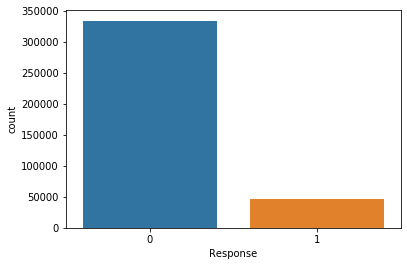

In [20]:
# it is imbalance dataset

sns.countplot(df_train['Response'])

In [21]:
df_train.shape

(381109, 12)

# Train-Test-Split

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data,df_train['Response'], test_size=0.33, random_state=101)

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score

lg = LogisticRegression()
lg.fit(X_train,y_train)
lg_predict = lg.predict(X_test)

print(classification_report(y_test,lg_predict))
print()
print(confusion_matrix(y_test,lg_predict))
print()
print("Accuracy -> ",accuracy_score(y_test,lg_predict))

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.88      1.00      0.93    110361
           1       0.00      0.00      0.00     15405

    accuracy                           0.88    125766
   macro avg       0.44      0.50      0.47    125766
weighted avg       0.77      0.88      0.82    125766


[[110361      0]
 [ 15405      0]]

Accuracy ->  0.8775106149515768


# Random-Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train,y_train)
rf_predict = rf.predict(X_test)


print(classification_report(y_test,rf_predict))
print()
print(confusion_matrix(y_test,rf_predict))
print()
print("Accuracy -> ",accuracy_score(y_test,rf_predict))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93    110361
           1       0.35      0.12      0.18     15405

    accuracy                           0.87    125766
   macro avg       0.62      0.54      0.55    125766
weighted avg       0.82      0.87      0.83    125766


[[107099   3262]
 [ 13610   1795]]

Accuracy ->  0.8658460951290492


# Roc Curve

In [34]:
from sklearn.model_selection import cross_val_predict

score = cross_val_predict(rf,train_data,df_train['Response'],cv=3) 

In [35]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(df_train['Response'],score)

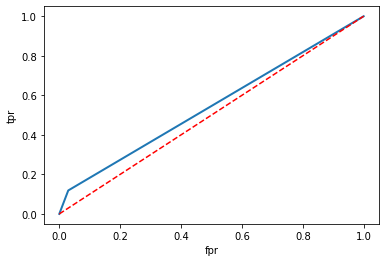

In [38]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2)
    plt.plot([0,1],[0,1],'r--')
    plt.xlabel('fpr')
    plt.ylabel('tpr')

plot_roc_curve(fpr,tpr)
plt.show()

# RandomForest perform best..

In [43]:
test_data.head(3)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0.928294,-0.890089,0.043233,-1.170327,1.083387,0.836715,-1.004995,0.310492,0.739349,-1.211054
1,0.928294,0.079795,0.043233,0.116590,-0.923031,-0.895018,0.995030,0.191048,-1.927487,-0.517782
2,0.928294,0.532408,0.043233,0.116590,-0.923031,-0.895018,0.995030,0.562126,0.224373,0.534079


In [44]:
test_predict = rf.predict(test_data)

In [52]:
df_test['predicted'] = test_predict

In [53]:
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,predicted
0,381110,1,25,1,11.0,1,1,0,35786.0,152.0,53,0
1,381111,1,40,1,28.0,0,0,1,33762.0,7.0,111,0
2,381112,1,47,1,28.0,0,0,1,40050.0,124.0,199,0
3,381113,1,24,1,27.0,1,1,1,37356.0,152.0,187,0
4,381114,1,27,1,28.0,1,1,0,59097.0,152.0,297,0


In [61]:
final_data = df_test[['id','predicted']]

In [63]:
final_data['predicted'].value_counts()

0    121879
1      5158
Name: predicted, dtype: int64

In [64]:
final_data.to_csv('sample_submission.csv',index=False)